## Part 2: Training your own ML Model

<a href="https://colab.research.google.com/github/peckjon/hosting-ml-as-microservice/blob/master/part2/train_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download corpuses

We'll continue using the `movie_reviews` corpus to train our model. The `stopwords` corpus contains a [set of standard stopwords](https://gist.github.com/sebleier/554280) we'll want to remove from the input, and `punkt` is used for toneization in the [.words()](https://www.nltk.org/api/nltk.corpus.html#corpus-reader-functions) method of the corpus reader.

In [3]:
from nltk import download

download('movie_reviews')
download('punkt')
download('stopwords')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/imanol/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /home/imanol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/imanol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Define feature extractor and bag-of-words converter

Given a list of (already tokenized) words, we need a function to extract just the ones we care about: those not found in the list of English stopwords or standard punctuation.

We also need a way to easily turn a list of words into a [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model), pairing each word with the count of its occurrences.

In [4]:
from nltk.corpus import stopwords
from nltk import SnowballStemmer
from string import punctuation

stopwords_eng = stopwords.words('english')
stemmer = SnowballStemmer("english")


def wordStemmer(wordrow):
    stemmed = [stemmer.stem(word) for word in wordrow]
    return stemmed

def extract_features(words):
    return [w for w in words if w not in stopwords_eng and w not in punctuation]

def lowerCaseArray(wordrow):
    lowercased = [word.lower() for word in wordrow]
    return lowercased

def bag_of_words(words):
    bag = {}
    for w in words:
        bag[w] = bag.get(w,0)+1
    return bag

### Ingest, clean, and convert the positive and negative reviews

For both the positive ("pos") and negative ("neg") sets of reviews, extract the features and convert to bag of words. From these, we construct a list of tuples known as a "featureset": the first part of each tuple is the bag of words for that review, and the second is its label ("pos"/"neg").

Note that `movie_reviews.words(fileid)` provides a tokenized list of words. If we wanted the un-tokenized text, we would use `movie_reviews.raw(fileid)` instead, then tokenize it using our preferred tokenizeer (e.g. [nltk.tokenize.word_tokenize](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.punkt.PunktLanguageVars.word_tokenize)).

In [5]:
from nltk.corpus import movie_reviews

data = {}

reviews_pos = {'wordMatrix': [], 'allWords': []}
reviews_neg = {'wordMatrix': [], 'allWords': []}
for fileid in movie_reviews.fileids('pos'):
    words_to_lower = extract_features(movie_reviews.words(fileid))
    words_to_stem = lowerCaseArray(words_to_lower)
    words = wordStemmer(words_to_stem)

    reviews_pos['allWords'].extend(words)
    reviews_pos['wordMatrix'].append(words)
for fileid in movie_reviews.fileids('neg'):
    words_to_lower = extract_features(movie_reviews.words(fileid))
    words_to_stem = lowerCaseArray(words_to_lower)
    words = wordStemmer(words_to_stem)

    reviews_neg['allWords'].extend(words)
    reviews_neg['wordMatrix'].append(words)

data['pos'] = reviews_pos
data['neg'] = reviews_neg

data_no_stem = {}

reviews_pos_no_stem = {'wordMatrix': [], 'allWords': []}
reviews_neg_no_stem = {'wordMatrix': [], 'allWords': []}
for fileid in movie_reviews.fileids('pos'):
    words_to_lower = extract_features(movie_reviews.words(fileid))
    words = lowerCaseArray(words_to_lower)

    reviews_pos_no_stem['allWords'].extend(words)
    reviews_pos_no_stem['wordMatrix'].append(words)
for fileid in movie_reviews.fileids('neg'):
    words_to_lower = extract_features(movie_reviews.words(fileid))
    words = lowerCaseArray(words_to_lower)

    reviews_neg_no_stem['allWords'].extend(words)
    reviews_neg_no_stem['wordMatrix'].append(words)

data_no_stem['pos'] = reviews_pos_no_stem
data_no_stem['neg'] = reviews_neg_no_stem

In [6]:
print(data['neg']['wordMatrix'][10])
print(data_no_stem['neg']['wordMatrix'][10])

['best', 'rememb', 'underst', 'perform', 'dr', 'hannib', 'lecter', 'michael', 'mann', 'forens', 'thriller', 'manhunt', 'scottish', 'charact', 'actor', 'brian', 'cox', 'bring', 'someth', 'special', 'everi', 'movi', 'work', 'usual', 'play', 'bit', 'role', 'studio', 'schlock', 'die', 'halfway', 'long', 'kiss', 'goodnight', 'occasion', 'given', 'someth', 'meati', 'substanti', 'want', 'see', 'brilliant', 'act', 'check', 'work', 'dog', 'polic', 'inspector', 'opposit', 'franc', 'mcdormand', 'ken', 'loach', 'hidden', 'agenda', 'cox', 'play', 'role', 'big', 'john', 'harrigan', 'disturb', 'new', 'indi', 'flick', 'l', 'e', 'lot', '47', 'pick', 'sundanc', 'distributor', 'scare', 'budg', 'big', 'john', 'feel', 'love', 'dare', 'speak', 'name', 'express', 'seek', 'adolesc', 'bring', 'back', 'pad', 'bother', 'audienc', 'member', 'present', 'big', 'john', 'odd', 'empathet', 'light', 'even', 'temper', 'funni', 'robust', 'old', 'man', 'actual', 'listen', 'kid', 'problem', 'oppos', 'parent', 'friend', 'ca

## Data exploration

Lets do a bit of data exploration to find most and least used terms.

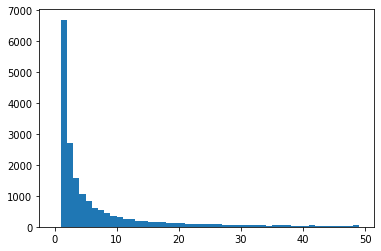

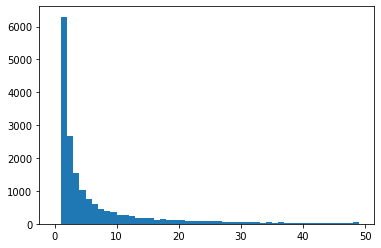

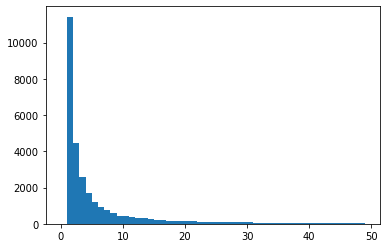

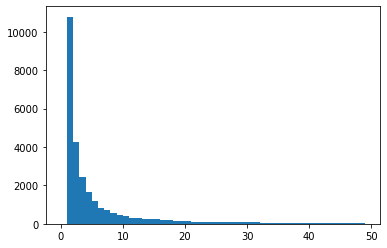

In [9]:
from nltk import FreqDist
import matplotlib.pyplot as plt

wordfreqs_cat1 = FreqDist(data['pos']['allWords'])
plt.hist(wordfreqs_cat1.values(), bins = range(50))
plt.show()

wordfreqs_cat2 = FreqDist(data['neg']['allWords'])
plt.hist(wordfreqs_cat2.values(), bins = range(50))
plt.show()

wordfreqs_cat1_no_stem = FreqDist(data_no_stem['pos']['allWords'])
plt.hist(wordfreqs_cat1_no_stem.values(), bins = range(50))
plt.show()

wordfreqs_cat2_no_stem = FreqDist(data_no_stem['neg']['allWords'])
plt.hist(wordfreqs_cat2_no_stem.values(), bins = range(50))
plt.show()

### Least frequent terms

In [10]:
print(wordfreqs_cat1.hapaxes())
print(wordfreqs_cat2.hapaxes())

print(wordfreqs_cat1_no_stem.hapaxes())
print(wordfreqs_cat2_no_stem.hapaxes())

['watchmen', 'sooti', 'surgic', 'godley', 'absinth', 'stonecutt', 'guttenberg', 'pragu', 'rooney', '_ferri', 'bueller_', 'gymnasium', 'tonal', 'mushi', 'dum', 'amiti', 'relent', 'crusti', 'dous', 'apprenticeship', 'kravitz', 'ahab', 'masoch', 'sinch', 'writih', 'chomp', 'alloc', 'lineback', 'herb', 'madrid', 'hairstylist', 'kevlar', 'hamster', 'kazdan', 'hatchet', 'stanleyvill', 'coalit', 'exert', 'tschomb', 'colonialist', 'nigeria', 'somalia', 'zimbabw', 'mozambiqu', 'yeoman', 'stalwart', 'lopsid', 'politico', 'davin', 'thoughtless', 'arbitrarili', 'meanest', 'skim', 'misdemeanor', 'elixir', 'nonent', 'knob', 'gentil', 'homey', 'ostentati', 'stevi', 'scrumptious', 'slop', 'delhem', 'publiqu', 'unrest', 'tshomb', 'secess', 'rabi', 'bantu', 'schwartznag', 'galosh', 'rongguang', 'sze', 'tsang', 'twinkl', 'to', 'siunin', 'tsi', 'titmalau', '112', 'holder', 'whichev', 'erudit', 'narcolept', 'inopportun', 'najimi', 'faucet', 'roadsid', 'salesperson', 'doze', 'thud', 'mirthless', 'neverend',

### Most frequent terms.

In [11]:
print(wordfreqs_cat1.most_common(20))
print(wordfreqs_cat2.most_common(20))

print(wordfreqs_cat1_no_stem.most_common(20))
print(wordfreqs_cat2_no_stem.most_common(20))

[('film', 6193), ('movi', 3160), ('one', 3155), ('charact', 2066), ('like', 2034), ('make', 1693), ('time', 1606), ('get', 1518), ('scene', 1365), ('stori', 1360), ('good', 1285), ('see', 1251), ('play', 1235), ('even', 1207), ('also', 1200), ('well', 1141), ('life', 1057), ('much', 1038), ('way', 1038), ('would', 1019)]
[('film', 5006), ('movi', 3817), ('one', 2874), ('like', 2103), ('charact', 1815), ('get', 1702), ('make', 1550), ('time', 1441), ('even', 1408), ('scene', 1306), ('good', 1191), ('play', 1147), ('bad', 1102), ('would', 1090), ('look', 1053), ('go', 1028), ('much', 1012), ('stori', 985), ('plot', 978), ('see', 973)]
[('film', 5230), ('one', 3052), ('movie', 2525), ('like', 1802), ('good', 1248), ('story', 1246), ('time', 1243), ('also', 1200), ('even', 1179), ('well', 1123), ('character', 1078), ('life', 1057), ('much', 1038), ('would', 1019), ('first', 1004), ('two', 999), ('characters', 986), ('see', 965), ('way', 929), ('--', 906)]
[('film', 4287), ('movie', 3246), 

### Data preparation: remove hapaxes 

In [13]:
import nltk

def wordFilter(excluded, wordrow):
    filtered = [word for word in wordrow if word not in excluded]
    return filtered

data_clean = {}

reviews_pos_clean = {'wordMatrix': [], 'allWords': []}
reviews_neg_clean = {'wordMatrix': [], 'allWords': []}

interWordListPos = data['pos']['allWords']
interWordMatrixPos = data['pos']['wordMatrix']

interWordListNeg = data['neg']['allWords']
interWordMatrixNeg = data['neg']['wordMatrix']

wordfreqsPos = nltk.FreqDist(interWordListPos)
hapaxesPos = wordfreqsPos.hapaxes()
for wordvector in interWordMatrixPos:
    wordvector_nohapaxes = wordFilter(hapaxesPos, wordvector)
    reviews_pos_clean['wordMatrix'].append(wordvector_nohapaxes)
    reviews_pos_clean['allWords'].extend(wordvector_nohapaxes)

wordfreqsNeg = nltk.FreqDist(interWordListNeg)
hapaxesNeg = wordfreqsNeg.hapaxes()
for wordvector in interWordMatrixNeg:
    wordvector_nohapaxes = wordFilter(hapaxesNeg, wordvector)
    reviews_neg_clean['wordMatrix'].append(wordvector_nohapaxes)
    reviews_neg_clean['allWords'].extend(wordvector_nohapaxes)

data_clean['pos'] = reviews_pos_clean
data_clean['neg'] = reviews_neg_clean

data_clean_no_stem = {}

reviews_pos_clean_no_stem = {'wordMatrix': [], 'allWords': []}
reviews_neg_clean_no_stem = {'wordMatrix': [], 'allWords': []}

interWordListPos_no_stem = data_no_stem['pos']['allWords']
interWordMatrixPos_no_stem = data_no_stem['pos']['wordMatrix']

interWordListNeg_no_stem = data_no_stem['neg']['allWords']
interWordMatrixNeg_no_stem = data_no_stem['neg']['wordMatrix']

wordfreqsPos_no_stem = nltk.FreqDist(interWordListPos_no_stem)
hapaxesPos_no_stem = wordfreqsPos_no_stem.hapaxes()
for wordvector in interWordMatrixPos_no_stem:
    wordvector_nohapaxes_no_stem = wordFilter(hapaxesPos_no_stem, wordvector)
    reviews_pos_clean_no_stem['wordMatrix'].append(wordvector_nohapaxes_no_stem)
    reviews_pos_clean_no_stem['allWords'].extend(wordvector_nohapaxes_no_stem)

wordfreqsNeg_no_stem = nltk.FreqDist(interWordListNeg_no_stem)
hapaxesNeg_no_stem = wordfreqsNeg_no_stem.hapaxes()
for wordvector in interWordMatrixNeg_no_stem:
    wordvector_nohapaxes_no_stem = wordFilter(hapaxesNeg_no_stem, wordvector)
    reviews_neg_clean_no_stem['wordMatrix'].append(wordvector_nohapaxes_no_stem)
    reviews_neg_clean_no_stem['allWords'].extend(wordvector_nohapaxes_no_stem)

data_clean_no_stem['pos'] = reviews_pos_clean_no_stem
data_clean_no_stem['neg'] = reviews_neg_clean_no_stem

In [14]:
wordfreqs_cat1 = nltk.FreqDist(data_clean['pos']['allWords'])
wordfreqs_cat2 = nltk.FreqDist(data_clean['neg']['allWords'])

print(wordfreqs_cat1.hapaxes())
print(wordfreqs_cat2.hapaxes())

wordfreqs_cat1_no_stem = nltk.FreqDist(data_clean_no_stem['pos']['allWords'])
wordfreqs_cat2_no_stem = nltk.FreqDist(data_clean_no_stem['neg']['allWords'])

print(wordfreqs_cat1_no_stem.hapaxes())
print(wordfreqs_cat2_no_stem.hapaxes())

[]
[]
[]
[]


### Data preparation

In [15]:
from collections import OrderedDict
import random

holdoutLenght = 100

labeled_data1 = [(word, 'pos') for word in 
                 data['pos']['wordMatrix'][holdoutLenght:]]
labeled_data2 = [(word, 'neg') for word in
                data['neg']['wordMatrix'][holdoutLenght:]]

labeled_data = []
labeled_data.extend(labeled_data1)
labeled_data.extend(labeled_data2)

holdout_data = data['pos']['wordMatrix'][:holdoutLenght]
holdout_data.extend(data['neg']['wordMatrix'][:holdoutLenght])

holdout_data_labels = ([('pos') for _ in range(holdoutLenght)] + [('neg') for _ in range(holdoutLenght)])

data['pos']['allWordsDedup'] = list(OrderedDict.fromkeys(data['pos']['allWords']))
data['neg']['allWordsDedup'] = list(OrderedDict.fromkeys(data['neg']['allWords']))

all_words = []
all_words.extend(data['pos']['allWordsDedup'])
all_words.extend(data['neg']['allWordsDedup'])
all_words_dedup = list(OrderedDict.fromkeys(all_words))

prepared_data = [({word: (word in x[0]) for word in all_words_dedup}, x[1]) for x in labeled_data]
prepared_holdout_data = [({word: (word in x[0]) for word in all_words_dedup}) for x in holdout_data]

###

labeled_data1_no_stem = [(word, 'pos') for word in 
                 data_no_stem['pos']['wordMatrix'][holdoutLenght:]]
labeled_data2_no_stem = [(word, 'neg') for word in
                data_no_stem['neg']['wordMatrix'][holdoutLenght:]]

labeled_data_no_stem = []
labeled_data_no_stem.extend(labeled_data1_no_stem)
labeled_data_no_stem.extend(labeled_data2_no_stem)

holdout_data_no_stem = data_no_stem['pos']['wordMatrix'][:holdoutLenght]
holdout_data_no_stem.extend(data_no_stem['neg']['wordMatrix'][:holdoutLenght])

holdout_data_labels_no_stem = ([('pos') for _ in range(holdoutLenght)] + [('neg') for _ in range(holdoutLenght)])

data_no_stem['pos']['allWordsDedup'] = list(OrderedDict.fromkeys(data_no_stem['pos']['allWords']))
data_no_stem['neg']['allWordsDedup'] = list(OrderedDict.fromkeys(data_no_stem['neg']['allWords']))

all_words_no_stem = []
all_words_no_stem.extend(data_no_stem['pos']['allWordsDedup'])
all_words_no_stem.extend(data_no_stem['neg']['allWordsDedup'])
all_words_dedup_no_stem = list(OrderedDict.fromkeys(all_words_no_stem))

prepared_data_no_stem = [({word: (word in x[0]) for word in all_words_dedup_no_stem}, x[1]) for x in labeled_data_no_stem]
prepared_holdout_data_no_stem = [({word: (word in x[0]) for word in all_words_dedup_no_stem}) for x in holdout_data_no_stem]

### Split reviews into training and test sets
We need to break up each group of reviews into a training set (about 80%) and a test set (the remaining 20%). In case there's some meaningful order to the reviews (e.g. the first 800 are from one group of reviewers, the next 200 are from another), we shuffle the sets first to ensure we aren't introducing additional bias. Note that this means our accuracy will not be exactly the same on every run; if you wish to see consistent results on each run, you can stabilize the shuffle by calling [random.seed(n)](https://www.geeksforgeeks.org/random-seed-in-python/) first.

In [16]:
random.shuffle(prepared_data)
train_size = int(len(prepared_data) * 0.8)
train = prepared_data[:train_size]
test = prepared_data[train_size:]

###

random.shuffle(prepared_data_no_stem)
train_size_no_stem = int(len(prepared_data_no_stem) * 0.8)
train_no_stem = prepared_data_no_stem[:train_size]
test_no_stem = prepared_data_no_stem[train_size_no_stem:]

In [17]:
print(prepared_data[100])
print(prepared_data_no_stem[100])

({'film': True, 'adapt': False, 'comic': False, 'book': False, 'plenti': False, 'success': False, 'whether': False, 'superhero': False, 'batman': False, 'superman': False, 'spawn': False, 'gear': False, 'toward': False, 'kid': False, 'casper': False, 'arthous': False, 'crowd': False, 'ghost': False, 'world': False, 'never': False, 'realli': True, 'like': False, 'hell': False, 'starter': False, 'creat': False, 'alan': False, 'moor': False, 'eddi': False, 'campbel': False, 'brought': True, 'medium': False, 'whole': True, 'new': True, 'level': True, 'mid': False, '80s': False, '12': False, 'part': False, 'seri': False, 'call': True, 'watchmen': False, 'say': False, 'thorough': False, 'research': False, 'subject': False, 'jack': False, 'ripper': False, 'would': True, 'michael': False, 'jackson': False, 'start': False, 'look': False, 'littl': True, 'odd': False, 'graphic': False, 'novel': False, '500': False, 'page': False, 'long': True, 'includ': False, 'near': False, '30': False, 'consist

### Train the model

Now that our data is ready, the training step itself is quite simple if we use the [NaiveBayesClassifier](https://www.nltk.org/api/nltk.classify.html#module-nltk.classify.naivebayes) provided by NLTK.

If you are used to methods such as `model.fit(x,y)` which take two parameters -- the data and the labels -- it may be confusing that `NaiveBayesClassifier.train` takes just one argument. This is because the labels are already embedded in `train`: each element in the set is a Bag of Words paired with a 'pos' or 'neg'; value.

In [18]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train)

classifier_no_stem = NaiveBayesClassifier.train(train_no_stem)

### Check model accuracy

NLTK's built-in [accuracy](https://www.nltk.org/api/nltk.classify.html#module-nltk.classify.util) utility can run our test_set through the model and compare the labels returned by the model to the labels in the test set, producing an overall % accuracy. Not too impressive, right? We need to improve.

In [20]:
from nltk.classify.util import accuracy

print(100 * accuracy(classifier, test))

print(100 * accuracy(classifier_no_stem, test_no_stem))

79.44444444444444
77.77777777777779


### Save the model
Our trained model will be cleared from memory when this notebook is closed. So that we can use it again later, save the model as a file using the [pickle](https://docs.python.org/3/library/pickle.html) serializer.

In [21]:
import pickle

model_file = open('sa_classifier.pickle','wb')
pickle.dump(classifier, model_file)
model_file.close()

model_file_no_stem = open('sa_classifier_no_stem.pickle','wb')
pickle.dump(classifier_no_stem, model_file_no_stem)
model_file_no_stem.close()

### Confusion Matrix

In [22]:
classified_data = classifier.classify_many(prepared_holdout_data)
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data)
print(cm)

classified_data_no_stem = classifier_no_stem.classify_many(prepared_holdout_data_no_stem)
cm_no_stem = nltk.ConfusionMatrix(holdout_data_labels_no_stem, classified_data_no_stem)
print(cm_no_stem)

    |   n   p |
    |   e   o |
    |   g   s |
----+---------+
neg |<100>  . |
pos | 100  <.>|
----+---------+
(row = reference; col = test)

    |   n   p |
    |   e   o |
    |   g   s |
----+---------+
neg |<100>  . |
pos | 100  <.>|
----+---------+
(row = reference; col = test)



In [23]:
print(classifier.show_most_informative_features(20))

print(classifier_no_stem.show_most_informative_features(20))

Most Informative Features
                outstand = True              pos : neg    =     14.7 : 1.0
                   muddl = True              neg : pos    =     11.2 : 1.0
                  finest = True              pos : neg    =     11.2 : 1.0
                seamless = True              pos : neg    =     10.8 : 1.0
                 miscast = True              neg : pos    =     10.5 : 1.0
                    deft = True              pos : neg    =      9.5 : 1.0
                  misfir = True              neg : pos    =      9.2 : 1.0
                   illog = True              neg : pos    =      9.2 : 1.0
                    zeta = True              neg : pos    =      9.2 : 1.0
                 incoher = True              neg : pos    =      9.2 : 1.0
                    taxi = True              pos : neg    =      8.8 : 1.0
                  ludicr = True              neg : pos    =      8.6 : 1.0
                    joli = True              neg : pos    =      8.5 : 1.0

## Train a Decision Tree model

In [24]:
from nltk.classify import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier.train(train)
decision_tree_model_no_stem = DecisionTreeClassifier.train(train_no_stem)

In [25]:
from nltk.classify import accuracy

print(100*accuracy(decision_tree_model, test))
print(100*accuracy(decision_tree_model_no_stem, test_no_stem))

63.05555555555556
64.72222222222223


In [26]:
classified_data2 = decision_tree_model.classify_many(prepared_holdout_data)
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data2)
print(cm)

classified_data2_no_stem = decision_tree_model_no_stem.classify_many(prepared_holdout_data_no_stem)
cm_no_stem = nltk.ConfusionMatrix(holdout_data_labels_no_stem, classified_data2_no_stem)
print(cm_no_stem)

    |   n   p |
    |   e   o |
    |   g   s |
----+---------+
neg |  <1> 99 |
pos |   .<100>|
----+---------+
(row = reference; col = test)

    |  n  p |
    |  e  o |
    |  g  s |
----+-------+
neg | <3>97 |
pos |  4<96>|
----+-------+
(row = reference; col = test)



In [27]:
print(decision_tree_model.pseudocode(depth=6))
print(decision_tree_model_no_stem.pseudocode(depth=6))

if bad == False: 
  if wast == False: 
    if stupid == False: 
      if lame == False: 
        if forgot == False: 
          if 0 == False: return 'pos'
          if 0 == True: return 'neg'
        if forgot == True: 
          if jelli == False: return 'neg'
          if jelli == True: return 'pos'
      if lame == True: 
        if flight == False: 
          if paralyz == False: return 'neg'
          if paralyz == True: return 'pos'
        if flight == True: return 'pos'
    if stupid == True: 
      if steal == False: 
        if typic == False: 
          if drink == False: return 'neg'
          if drink == True: return 'pos'
        if typic == True: return 'pos'
      if steal == True: 
        if belliger == False: return 'pos'
        if belliger == True: return 'neg'
  if wast == True: 
    if strong == False: 
      if terrif == False: 
        if led == False: 
          if fish == False: return 'neg'
          if fish == True: return 'pos'
        if led == True: ret

### Save the model (Colab version)

Google Colab doesn't provide direct access to files saved during a notebook session, so we need to save it in [Google Drive](https://drive.google.com) instead. The first time you run this, it will ask for permission to access your Google Drive. Follow the instructions, then wait a few minutes and look for a new folder called "Colab Output" in [Drive](https://drive.google.com). Note that Colab does not alway sync to Drive immediately, so check the file update times and re-run this cell if it doesn't look like you have the most revent version of your file.

In [ ]:
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    !mkdir -p '/content/gdrive/My Drive/Colab Output'
    model_file = open('/content/gdrive/My Drive/Colab Output/sa_classifier.pickle','wb')
    pickle.dump(model, model_file)
    model_file.flush()
    print('Model saved in /content/gdrive/My Drive/Colab Output')
    !ls '/content/gdrive/My Drive/Colab Output'
    drive.flush_and_unmount()
    print('Re-run this cell if you cannot find it in https://drive.google.com')